In [1]:
%matplotlib inline

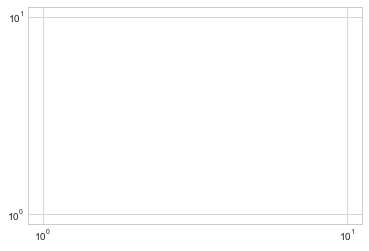

In [2]:
# 주 눈금과 보조 눈금
import matplotlib.pyplot as plt, numpy as np
plt.style.use("seaborn-whitegrid")

ax = plt.axes(xscale="log", yscale="log")

print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

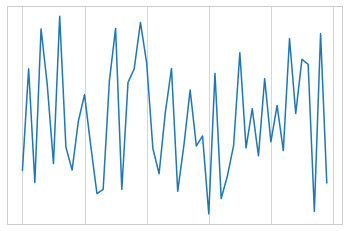

In [3]:
# 눈금 또는 레이블 숨기기
# plt.NullLocator(), plt.NullFormatter()

ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator()) # no ticks
ax.xaxis.set_major_formatter(plt.NullFormatter()) # no labels on the ticks

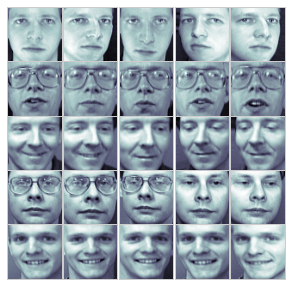

In [4]:
# 눈금이 전혀 없으면 많은 경우에 유용
fig, ax = plt.subplots(5, 5, figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)

# Scikit-learn에서 얼굴 데이터 가져오기
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

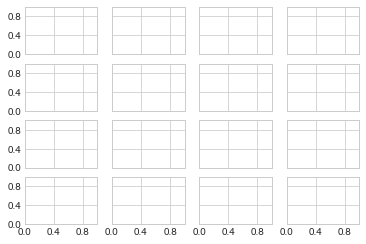

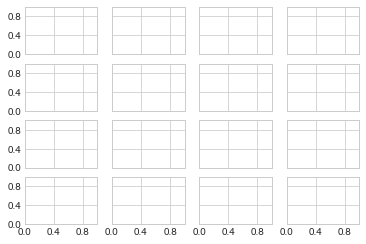

In [5]:
# 눈금 개수 줄이기와 늘리기
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

# plt.MaxNLoocator() -> 표시할 최대 눈금 개수 지정
# 모든 축에 대해 x와 y의 주 눈금의 위치 지시자를 설정
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

fig

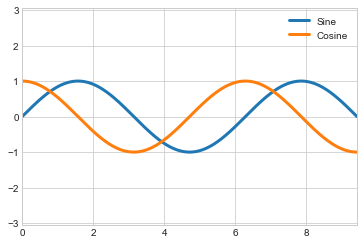

In [6]:
# 팬시 눈금 포맷
# 사인과 코사인 곡선 플로팅
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label="Sine")
ax.plot(x, np.cos(x), lw=3, label="Cosine")

# 그리드, 범례, 한곗값 설정
ax.grid(True)
ax.legend(frameon=False)
ax.axis("equal")
ax.set_xlim(0, 3 * np.pi);

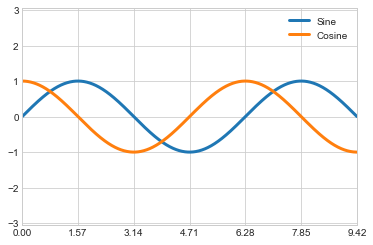

In [7]:
# 눈금과 그리드 선 간격을 pi의 배수
# MultipleLocator
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 2))
fig

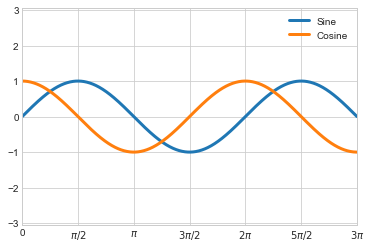

In [8]:
# plt.FuncFormatter
# "$\pi$" => Greek letter pi

def format_func(value, tick_number):
    # pi/2 배수 구하기
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 == 1:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

In [9]:
# 포맷 지시자와 위치 지시자 요약

# ...Locator (눈금 / tick)
# Nulll, Fixed, Index, Linear, Log, Multiple, MaxN, Auto, AutoMinor

# ...Formatter (눈금 레이블 / label on tick)
# Null, Index, Fixed, Func, FormatStr, Scalar, Log